# **Packages import**

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 16.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from arch import arch_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Processing MASI dataset**

In [ ]:
df = pd.read_csv("Moroccan All Shares - Données Historiques.csv")
df

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
0,19/12/2025,"18.938,30","18.815,95","19.005,82","18.815,95",NaN,"0,65%"
1,18/12/2025,"18.815,95","18.760,08","18.869,60","18.759,49",NaN,"0,30%"
2,17/12/2025,"18.760,08","18.583,78","18.767,61","18.583,78",NaN,"0,95%"
3,16/12/2025,"18.583,78","18.553,93","18.671,92","18.543,49",NaN,"0,16%"
4,15/12/2025,"18.553,93","18.566,51","18.694,45","18.515,19",NaN,"-0,07%"
...,...,...,...,...,...,...,...
1232,08/01/2021,"11.249,14","11.271,23","11.298,06","11.244,10",NaN,"-0,20%"
1233,07/01/2021,"11.271,23","11.215,71","11.303,69","11.215,71",NaN,"0,50%"
1234,06/01/2021,"11.215,71","11.253,70","11.277,86","11.210,15",NaN,"-0,34%"
1235,05/01/2021,"11.253,70","11.308,67","11.327,53","11.253,28",NaN,"-0,77%"


In [ ]:
# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"])

for col in df.columns:
    if col == "Date" or col == "Vol." or col == "Variation %":
        continue
    df[col] = (
        df[col]
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

/tmp/ipython-input-1065603435.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
df.isna().sum()

,0
Date,0
Dernier,0
Ouv.,0
Plus Haut,0
Plus Bas,0
Vol.,1237
Variation %,0


In [ ]:
df.drop(columns = ["Vol."], inplace = True)
df.isna().sum()

,0
Date,0
Dernier,0
Ouv.,0
Plus Haut,0
Plus Bas,0
Variation %,0


In [ ]:
# Flag Fridays
df["is_friday"] = df["Date"].dt.weekday == 4

df

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %,is_friday
0,2025-12-19,18938.30,18815.95,19005.82,18815.95,"0,65%",True
1,2025-12-18,18815.95,18760.08,18869.60,18759.49,"0,30%",False
2,2025-12-17,18760.08,18583.78,18767.61,18583.78,"0,95%",False
3,2025-12-16,18583.78,18553.93,18671.92,18543.49,"0,16%",False
4,2025-12-15,18553.93,18566.51,18694.45,18515.19,"-0,07%",False
...,...,...,...,...,...,...,...
1232,2021-01-08,11249.14,11271.23,11298.06,11244.10,"-0,20%",True
1233,2021-01-07,11271.23,11215.71,11303.69,11215.71,"0,50%",False
1234,2021-01-06,11215.71,11253.70,11277.86,11210.15,"-0,34%",False
1235,2021-01-05,11253.70,11308.67,11327.53,11253.28,"-0,77%",False


In [ ]:

df["weekly_mean"] = (
    df
    .groupby(df["Date"].dt.to_period("W-FRI"))["Dernier"]
    .transform("mean")
)


In [ ]:
df.head(20)

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %,is_friday,weekly_mean
0,2025-12-19,18938.30,18815.95,19005.82,18815.95,"0,65%",True,18730.408
1,2025-12-18,18815.95,18760.08,18869.60,18759.49,"0,30%",False,18730.408
2,2025-12-17,18760.08,18583.78,18767.61,18583.78,"0,95%",False,18730.408
3,2025-12-16,18583.78,18553.93,18671.92,18543.49,"0,16%",False,18730.408
4,2025-12-15,18553.93,18566.51,18694.45,18515.19,"-0,07%",False,18730.408
5,2025-12-12,18566.51,18498.78,18622.63,18498.78,"0,37%",True,18503.504
6,2025-12-11,18498.78,18520.07,18545.73,18418.11,"-0,11%",False,18503.504
7,2025-12-10,18520.07,18458.27,18529.44,18396.95,"0,33%",False,18503.504
8,2025-12-09,18458.70,18473.46,18527.50,18410.70,"-0,08%",False,18503.504
9,2025-12-08,18473.46,18469.38,18563.04,18418.04,"0,02%",False,18503.504


In [ ]:
df.isna().sum()

,0
Date,0
Dernier,0
Ouv.,0
Plus Haut,0
Plus Bas,0
Variation %,0
is_friday,0
weekly_mean,0


In [ ]:
df_filtered = df[df["is_friday"]]
df_filtered = df_filtered.sort_values(by = "Date", ascending= True)
df_filtered.reset_index(drop = True, inplace = True)
df_filtered

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %,is_friday,weekly_mean
0,2021-01-08,11249.14,11271.23,11298.06,11244.10,"-0,20%",True,11266.1280
1,2021-01-15,11416.19,11326.79,11442.59,11315.60,"0,79%",True,11325.5150
2,2021-01-22,11563.73,11514.99,11567.93,11499.44,"0,42%",True,11508.4480
3,2021-01-29,11630.01,11657.63,11711.26,11630.01,"-0,24%",True,11667.5300
4,2021-02-05,11713.50,11742.17,11778.18,11713.50,"-0,24%",True,11710.7080
...,...,...,...,...,...,...,...,...
245,2025-11-21,18205.28,18112.94,18217.85,18112.90,"0,51%",True,18255.5225
246,2025-11-28,18603.59,18640.63,18662.77,18492.47,"-0,20%",True,18500.0160
247,2025-12-05,18469.38,18386.27,18480.01,18339.21,"0,45%",True,18402.5740
248,2025-12-12,18566.51,18498.78,18622.63,18498.78,"0,37%",True,18503.5040


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         250 non-null    datetime64[ns]
 1   Dernier      250 non-null    float64       
 2   Ouv.         250 non-null    float64       
 3    Plus Haut   250 non-null    float64       
 4   Plus Bas     250 non-null    float64       
 5   Variation %  250 non-null    object        
 6   is_friday    250 non-null    bool          
 7   weekly_mean  250 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(5), object(1)
memory usage: 14.0+ KB


In [ ]:
# Make sure data is sorted by date
df_filtered = df_filtered.sort_values("Date").reset_index(drop=True)

# Compute weekly variation (week-over-week) in percentage (%)
df_filtered["Variation %"] = df_filtered["weekly_mean"].pct_change()*100
df_filtered

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Variation %,is_friday,weekly_mean
0,2021-01-08,11249.14,11271.23,11298.06,11244.10,NaN,True,11266.1280
1,2021-01-15,11416.19,11326.79,11442.59,11315.60,0.527129,True,11325.5150
2,2021-01-22,11563.73,11514.99,11567.93,11499.44,1.615229,True,11508.4480
3,2021-01-29,11630.01,11657.63,11711.26,11630.01,1.382306,True,11667.5300
4,2021-02-05,11713.50,11742.17,11778.18,11713.50,0.370070,True,11710.7080
...,...,...,...,...,...,...,...,...
245,2025-11-21,18205.28,18112.94,18217.85,18112.90,-2.645324,True,18255.5225
246,2025-11-28,18603.59,18640.63,18662.77,18492.47,1.339285,True,18500.0160
247,2025-12-05,18469.38,18386.27,18480.01,18339.21,-0.526713,True,18402.5740
248,2025-12-12,18566.51,18498.78,18622.63,18498.78,0.548456,True,18503.5040


In [ ]:
df_final = df_filtered.drop(columns = ["Dernier", "Ouv.", " Plus Haut", "Plus Bas", "is_friday"])
df_final.fillna(0, inplace = True)

In [ ]:
df_final.to_csv("MASI_cleaned.csv", index = False)

# **Processing ATTIJARI DIVERSIFIE**

In [ ]:
attijari = pd.read_csv("DIVERSIFIE_ALL.csv", parse_dates=True)
attijari

,Date,Fonds,Horizon minimum conseillé,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans
0,2021-01-08,ATTIJARI DIVERSIFIE,4,539.68,0.25%,0.18%,5.99%,0.55%,11.23%,9.21%,35.94%
1,2021-01-15,ATTIJARI DIVERSIFIE,4,543.51,0.96%,0.71%,6.43%,0.26%,11.42%,9.34%,37.15%
2,2021-01-22,ATTIJARI DIVERSIFIE,4,546.53,1.52%,0.56%,6.98%,0.31%,11.49%,9.69%,37.75%
3,2021-01-29,ATTIJARI DIVERSIFIE,4,547.58,1.72%,0.19%,7.23%,0.88%,11.53%,9.54%,37.77%
4,2021-02-12,ATTIJARI DIVERSIFIE,4,549.92,2.15%,0.23%,7.33%,2.47%,11.25%,10.05%,38.14%
...,...,...,...,...,...,...,...,...,...,...,...
244,2025-11-14,ATTIJARI DIVERSIFIE,4,726.77,13.90%,1.87%,3.89%,13.26%,29.74%,35.37%,39.45%
245,2025-11-21,ATTIJARI DIVERSIFIE,4,715.36,12.11%,1.57%,1.21%,11.56%,27.49%,32.53%,36.14%
246,2025-11-28,ATTIJARI DIVERSIFIE,4,723.81,13.43%,1.18%,2.42%,13.34%,29.42%,33.47%,38.04%
247,2025-12-05,ATTIJARI DIVERSIFIE,4,720.56,12.92%,0.45%,0.59%,13.14%,28.26%,31.91%,36.83%


In [ ]:
attijari.drop(columns=["Fonds",	"Horizon minimum conseillé"], inplace = True)
attijari

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans
0,2021-01-08,539.68,0.25%,0.18%,5.99%,0.55%,11.23%,9.21%,35.94%
1,2021-01-15,543.51,0.96%,0.71%,6.43%,0.26%,11.42%,9.34%,37.15%
2,2021-01-22,546.53,1.52%,0.56%,6.98%,0.31%,11.49%,9.69%,37.75%
3,2021-01-29,547.58,1.72%,0.19%,7.23%,0.88%,11.53%,9.54%,37.77%
4,2021-02-12,549.92,2.15%,0.23%,7.33%,2.47%,11.25%,10.05%,38.14%
...,...,...,...,...,...,...,...,...,...
244,2025-11-14,726.77,13.90%,1.87%,3.89%,13.26%,29.74%,35.37%,39.45%
245,2025-11-21,715.36,12.11%,1.57%,1.21%,11.56%,27.49%,32.53%,36.14%
246,2025-11-28,723.81,13.43%,1.18%,2.42%,13.34%,29.42%,33.47%,38.04%
247,2025-12-05,720.56,12.92%,0.45%,0.59%,13.14%,28.26%,31.91%,36.83%


In [ ]:
attijari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Date                                          249 non-null    object 
 1   Valeur Liquidative                            249 non-null    float64
 2   Performances glissantes Depuis Début d'année  249 non-null    object 
 3   Performances glissantes 1 semaine             249 non-null    object 
 4   Performances glissantes 6 mois                249 non-null    object 
 5   Performances glissantes 1 an                  249 non-null    object 
 6   Performances glissantes 2 ans                 249 non-null    object 
 7   Performances glissantes 3 ans                 249 non-null    object 
 8   Performances glissantes 5 ans                 249 non-null    object 
dtypes: float64(1), object(8)
memory usage: 17.6+ KB


In [ ]:
columns_to_clean = ["Performances glissantes Depuis Début d'année",	"Performances glissantes 1 semaine", "Performances glissantes 6 mois", "Performances glissantes 1 an", "Performances glissantes 2 ans",	"Performances glissantes 3 ans", "Performances glissantes 5 ans"]

In [ ]:
for col in columns_to_clean:
    attijari[col] = (
    attijari[col]
    .str.replace("%", "", regex=False)
    .astype(float)
)
attijari

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14
...,...,...,...,...,...,...,...,...,...
244,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45
245,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14
246,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04
247,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83


In [ ]:
attijari["Date"] = pd.to_datetime(attijari["Date"])
attijari

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14
...,...,...,...,...,...,...,...,...,...
244,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45
245,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14
246,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04
247,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83


In [ ]:
attijari.to_csv("attijari_diversifie.csv", index = False)

# **Merging MASI and Attijari data**

In [ ]:
df_merged = pd.merge(attijari, df_final, on = "Date", how = "inner")
df_merged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94,0.000000,11266.1280
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15,0.527129,11325.5150
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75,1.615229,11508.4480
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77,1.382306,11667.5300
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460
...,...,...,...,...,...,...,...,...,...,...,...
229,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620
230,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225
231,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04,1.339285,18500.0160
232,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83,-0.526713,18402.5740


# **Feature engineering**

In [ ]:
# df = ton DataFrame
for lag in range(1, 5):
    df_merged[f'rendement_lag_{lag}'] = df_merged['Performances glissantes 1 semaine'].shift(lag)

In [ ]:
df_merged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean,rendement_lag_1,rendement_lag_2,rendement_lag_3,rendement_lag_4
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94,0.000000,11266.1280,NaN,NaN,NaN,NaN
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15,0.527129,11325.5150,0.18,NaN,NaN,NaN
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75,1.615229,11508.4480,0.71,0.18,NaN,NaN
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77,1.382306,11667.5300,0.56,0.71,0.18,NaN
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460,0.19,0.56,0.71,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620,0.94,0.89,2.30,0.26
230,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225,1.87,0.94,0.89,2.30
231,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04,1.339285,18500.0160,1.57,1.87,0.94,0.89
232,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83,-0.526713,18402.5740,1.18,1.57,1.87,0.94


In [ ]:
df_lagged = df_merged.copy()
df_lagged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean,rendement_lag_1,rendement_lag_2,rendement_lag_3,rendement_lag_4
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94,0.000000,11266.1280,NaN,NaN,NaN,NaN
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15,0.527129,11325.5150,0.18,NaN,NaN,NaN
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75,1.615229,11508.4480,0.71,0.18,NaN,NaN
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77,1.382306,11667.5300,0.56,0.71,0.18,NaN
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460,0.19,0.56,0.71,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620,0.94,0.89,2.30,0.26
230,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225,1.87,0.94,0.89,2.30
231,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04,1.339285,18500.0160,1.57,1.87,0.94,0.89
232,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83,-0.526713,18402.5740,1.18,1.57,1.87,0.94


In [ ]:
df_lagged['returns'] = df_lagged['Performances glissantes 1 semaine'] / 100

# Remove missing values
returns = df_lagged['returns'].dropna()
returns

,returns
0,0.0018
1,0.0071
2,0.0056
3,0.0019
4,0.0023
...,...
229,0.0187
230,0.0157
231,0.0118
232,0.0045


In [ ]:
# Define the model
garch = arch_model(
    returns,
    mean='Constant',
    vol='GARCH',
    p=1,
    q=1,
    dist='normal'   # or 't' (often better in finance)
)

# Fit the model
garch_result = garch.fit(disp="off")

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.029e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


In [ ]:
# Conditional volatility (σ_t)
df_lagged.loc[returns.index, 'garch_vol'] = garch_result.conditional_volatility
df_lagged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean,rendement_lag_1,rendement_lag_2,rendement_lag_3,rendement_lag_4,returns,garch_vol
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94,0.000000,11266.1280,NaN,NaN,NaN,NaN,0.0018,0.005041
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15,0.527129,11325.5150,0.18,NaN,NaN,NaN,0.0071,0.005625
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75,1.615229,11508.4480,0.71,0.18,NaN,NaN,0.0056,0.005751
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77,1.382306,11667.5300,0.56,0.71,0.18,NaN,0.0019,0.005777
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460,0.19,0.56,0.71,0.18,0.0023,0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620,0.94,0.89,2.30,0.26,0.0187,0.006384
230,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225,1.87,0.94,0.89,2.30,0.0157,0.007349
231,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04,1.339285,18500.0160,1.57,1.87,0.94,0.89,0.0118,0.007228
232,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83,-0.526713,18402.5740,1.18,1.57,1.87,0.94,0.0045,0.006714


In [ ]:
df_lagged['garch_vol_lag_1'] = df_lagged['garch_vol'].shift(1)
df_lagged['garch_vol_lag_2'] = df_lagged['garch_vol'].shift(2)
df_lagged


,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean,rendement_lag_1,rendement_lag_2,rendement_lag_3,rendement_lag_4,returns,garch_vol,garch_vol_lag_1,garch_vol_lag_2
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94,0.000000,11266.1280,NaN,NaN,NaN,NaN,0.0018,0.005041,NaN,NaN
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15,0.527129,11325.5150,0.18,NaN,NaN,NaN,0.0071,0.005625,0.005041,NaN
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75,1.615229,11508.4480,0.71,0.18,NaN,NaN,0.0056,0.005751,0.005625,0.005041
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77,1.382306,11667.5300,0.56,0.71,0.18,NaN,0.0019,0.005777,0.005751,0.005625
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460,0.19,0.56,0.71,0.18,0.0023,0.005896,0.005777,0.005751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620,0.94,0.89,2.30,0.26,0.0187,0.006384,0.006902,0.008109
230,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225,1.87,0.94,0.89,2.30,0.0157,0.007349,0.006384,0.006902
231,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04,1.339285,18500.0160,1.57,1.87,0.94,0.89,0.0118,0.007228,0.007349,0.006384
232,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83,-0.526713,18402.5740,1.18,1.57,1.87,0.94,0.0045,0.006714,0.007228,0.007349


In [ ]:
# Compute future squared returns
future_sq_returns = returns.shift(-1)**2 + returns.shift(-2)**2

# Compute 2-week future volatility
df_lagged['vol_future_2w'] = np.sqrt(future_sq_returns / 2)
df_lagged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean,rendement_lag_1,rendement_lag_2,rendement_lag_3,rendement_lag_4,returns,garch_vol,garch_vol_lag_1,garch_vol_lag_2,vol_future_2w
0,2021-01-08,539.68,0.25,0.18,5.99,0.55,11.23,9.21,35.94,0.000000,11266.1280,NaN,NaN,NaN,NaN,0.0018,0.005041,NaN,NaN,0.006394
1,2021-01-15,543.51,0.96,0.71,6.43,0.26,11.42,9.34,37.15,0.527129,11325.5150,0.18,NaN,NaN,NaN,0.0071,0.005625,0.005041,NaN,0.004182
2,2021-01-22,546.53,1.52,0.56,6.98,0.31,11.49,9.69,37.75,1.615229,11508.4480,0.71,0.18,NaN,NaN,0.0056,0.005751,0.005625,0.005041,0.002110
3,2021-01-29,547.58,1.72,0.19,7.23,0.88,11.53,9.54,37.77,1.382306,11667.5300,0.56,0.71,0.18,NaN,0.0019,0.005777,0.005751,0.005625,0.002300
4,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460,0.19,0.56,0.71,0.18,0.0023,0.005896,0.005777,0.005751,0.004610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620,0.94,0.89,2.30,0.26,0.0187,0.006384,0.006902,0.008109,0.013888
230,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225,1.87,0.94,0.89,2.30,0.0157,0.007349,0.006384,0.006902,0.008930
231,2025-11-28,723.81,13.43,1.18,2.42,13.34,29.42,33.47,38.04,1.339285,18500.0160,1.57,1.87,0.94,0.89,0.0118,0.007228,0.007349,0.006384,0.003946
232,2025-12-05,720.56,12.92,0.45,0.59,13.14,28.26,31.91,36.83,-0.526713,18402.5740,1.18,1.57,1.87,0.94,0.0045,0.006714,0.007228,0.007349,NaN


In [ ]:
df_lagged.isna().sum()

,0
Date,0
Valeur Liquidative,0
Performances glissantes Depuis Début d'année,0
Performances glissantes 1 semaine,0
Performances glissantes 6 mois,0
Performances glissantes 1 an,0
Performances glissantes 2 ans,0
Performances glissantes 3 ans,0
Performances glissantes 5 ans,0
Variation %,0


In [ ]:
df_lagged.dropna(inplace = True)
df_lagged.isna().sum()

,0
Date,0
Valeur Liquidative,0
Performances glissantes Depuis Début d'année,0
Performances glissantes 1 semaine,0
Performances glissantes 6 mois,0
Performances glissantes 1 an,0
Performances glissantes 2 ans,0
Performances glissantes 3 ans,0
Performances glissantes 5 ans,0
Variation %,0


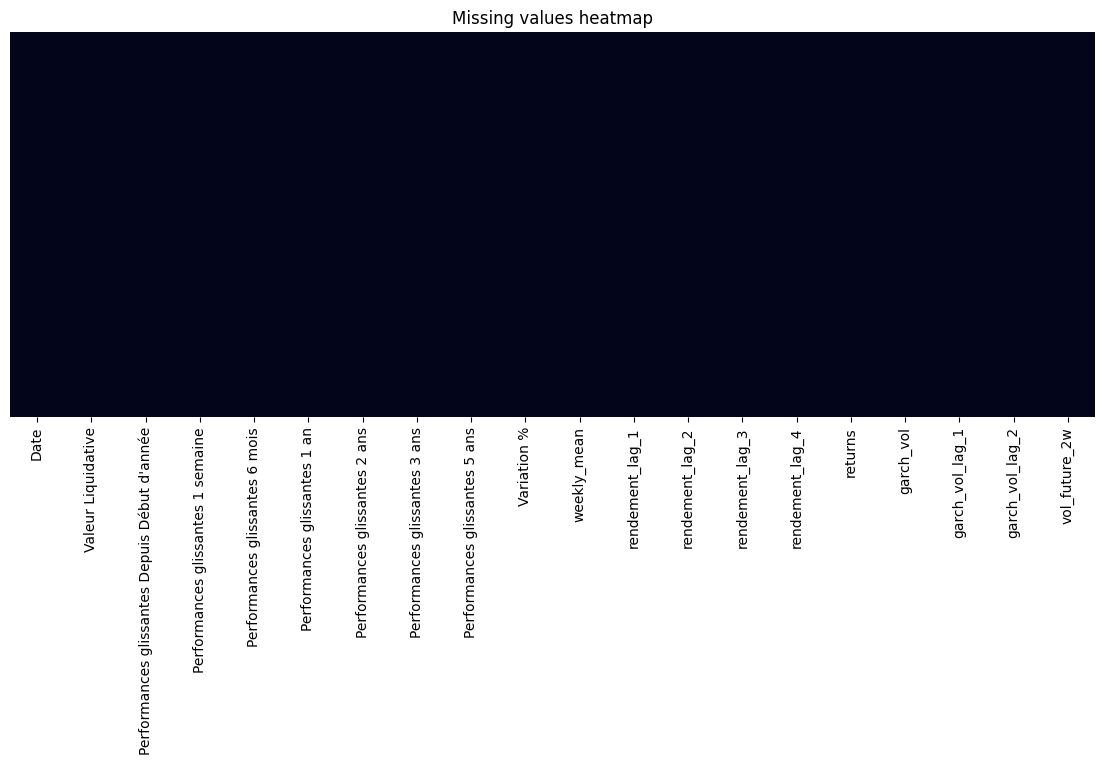

In [ ]:
plt.figure(figsize=(14, 5))
sns.heatmap(
    df_lagged.isna(),
    yticklabels=False,
    cbar=False
)
plt.title("Missing values heatmap")
plt.show()

In [ ]:
df_lagged.reset_index(drop = True, inplace = True)
df_lagged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,weekly_mean,rendement_lag_1,rendement_lag_2,rendement_lag_3,rendement_lag_4,returns,garch_vol,garch_vol_lag_1,garch_vol_lag_2,vol_future_2w
0,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,11613.8460,0.19,0.56,0.71,0.18,0.0023,0.005896,0.005777,0.005751,0.004610
1,2021-02-19,548.67,1.92,0.23,7.05,1.53,10.83,9.63,36.87,-0.696358,11532.9720,0.23,0.19,0.56,0.71,0.0023,0.005920,0.005896,0.005777,0.004539
2,2021-02-26,545.32,1.30,0.61,6.71,1.90,10.52,8.99,36.51,-1.441762,11366.6940,0.23,0.23,0.19,0.56,0.0061,0.005929,0.005920,0.005896,0.003482
3,2021-03-05,544.22,1.09,0.20,6.08,4.55,10.38,8.71,35.47,-0.126193,11352.3500,0.61,0.23,0.23,0.19,0.0020,0.005852,0.005929,0.005920,0.003377
4,2021-03-12,546.67,1.55,0.45,6.58,8.68,11.52,9.36,35.74,0.097636,11363.4340,0.20,0.61,0.23,0.23,0.0045,0.005919,0.005852,0.005929,0.001298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2025-10-31,747.63,17.17,0.89,7.61,18.52,33.91,39.30,44.95,0.954530,19493.9240,2.30,0.26,0.83,1.51,0.0089,0.008109,0.006085,0.006339,0.014799
224,2025-11-07,740.59,16.06,0.94,5.85,16.00,32.80,39.53,42.39,-0.037494,19486.6150,0.89,2.30,0.26,0.83,0.0094,0.006902,0.008109,0.006085,0.017265
225,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,18751.5620,0.94,0.89,2.30,0.26,0.0187,0.006384,0.006902,0.008109,0.013888
226,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,18255.5225,1.87,0.94,0.89,2.30,0.0157,0.007349,0.006384,0.006902,0.008930


In [ ]:
df_lagged.to_csv("final_dataset.csv", index = False)

# **Model training**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df_lagged['vol_future_2w_1'] = df_lagged['vol_future_2w'].shift(1)
df_lagged['vol_future_2w_2'] = df_lagged['vol_future_2w'].shift(2)
df_lagged['vol_future_2w_3'] = df_lagged['vol_future_2w'].shift(3)
df_lagged

,Date,Valeur Liquidative,Performances glissantes Depuis Début d'année,Performances glissantes 1 semaine,Performances glissantes 6 mois,Performances glissantes 1 an,Performances glissantes 2 ans,Performances glissantes 3 ans,Performances glissantes 5 ans,Variation %,...,rendement_lag_3,rendement_lag_4,returns,garch_vol,garch_vol_lag_1,garch_vol_lag_2,vol_future_2w,vol_future_2w_1,vol_future_2w_2,vol_future_2w_3
0,2021-02-12,549.92,2.15,0.23,7.33,2.47,11.25,10.05,38.14,-0.827123,...,0.71,0.18,0.0023,0.005896,0.005777,0.005751,0.004610,NaN,NaN,NaN
1,2021-02-19,548.67,1.92,0.23,7.05,1.53,10.83,9.63,36.87,-0.696358,...,0.56,0.71,0.0023,0.005920,0.005896,0.005777,0.004539,0.004610,NaN,NaN
2,2021-02-26,545.32,1.30,0.61,6.71,1.90,10.52,8.99,36.51,-1.441762,...,0.19,0.56,0.0061,0.005929,0.005920,0.005896,0.003482,0.004539,0.004610,NaN
3,2021-03-05,544.22,1.09,0.20,6.08,4.55,10.38,8.71,35.47,-0.126193,...,0.23,0.19,0.0020,0.005852,0.005929,0.005920,0.003377,0.003482,0.004539,0.004610
4,2021-03-12,546.67,1.55,0.45,6.58,8.68,11.52,9.36,35.74,0.097636,...,0.23,0.23,0.0045,0.005919,0.005852,0.005929,0.001298,0.003377,0.003482,0.004539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2025-10-31,747.63,17.17,0.89,7.61,18.52,33.91,39.30,44.95,0.954530,...,0.83,1.51,0.0089,0.008109,0.006085,0.006339,0.014799,0.009153,0.017439,0.016367
224,2025-11-07,740.59,16.06,0.94,5.85,16.00,32.80,39.53,42.39,-0.037494,...,0.26,0.83,0.0094,0.006902,0.008109,0.006085,0.017265,0.014799,0.009153,0.017439
225,2025-11-14,726.77,13.90,1.87,3.89,13.26,29.74,35.37,39.45,-3.772092,...,2.30,0.26,0.0187,0.006384,0.006902,0.008109,0.013888,0.017265,0.014799,0.009153
226,2025-11-21,715.36,12.11,1.57,1.21,11.56,27.49,32.53,36.14,-2.645324,...,0.89,2.30,0.0157,0.007349,0.006384,0.006902,0.008930,0.013888,0.017265,0.014799


In [ ]:
df_lagged.dropna(inplace = True)

In [ ]:
TARGET = "vol_future_2w"


df_model = df_lagged.copy()

#X = df_model.drop(columns=[TARGET])
#X = df_model[["vol_future_2w_1", "vol_future_2w_2", "vol_future_2w_3", "returns", "rendement_lag_1", "rendement_lag_2"]]
X = df_model[["vol_future_2w_1", "vol_future_2w_2", "vol_future_2w_3", "Performances glissantes 1 semaine", "rendement_lag_1", "garch_vol", "Variation %"]]
#X = df_model[["vol_future_2w_1", "vol_future_2w_2", "vol_future_2w_3"]]
y = df_model[TARGET]

In [ ]:
X = X.drop(columns=["Date", "Valeur Liquidative", "weekly_mean" , "Performances glissantes 1 semaine", "garch_vol_lag_1", "garch_vol_lag_2", "Performances glissantes Depuis Début d'année", "Performances glissantes 1 an", "Performances glissantes 2 ans", "Performances glissantes 3 ans", "Performances glissantes 5 ans"])

In [ ]:
split_ratio = 0.8
split_idx = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [ ]:
X

,vol_future_2w_1,vol_future_2w_2,vol_future_2w_3,Performances glissantes 1 semaine,rendement_lag_1,garch_vol,Variation %
3,0.003482,0.004539,0.004610,0.20,0.61,0.005852,-0.126193
4,0.003377,0.003482,0.004539,0.45,0.20,0.005919,0.097636
5,0.001298,0.003377,0.003482,0.16,0.45,0.005852,1.075538
6,0.002761,0.001298,0.003377,0.09,0.16,0.005944,-0.308019
7,0.002797,0.002761,0.001298,0.38,0.09,0.006029,0.626972
...,...,...,...,...,...,...,...
223,0.009153,0.017439,0.016367,0.89,2.30,0.008109,0.954530
224,0.014799,0.009153,0.017439,0.94,0.89,0.006902,-0.037494
225,0.017265,0.014799,0.009153,1.87,0.94,0.006384,-3.772092
226,0.013888,0.017265,0.014799,1.57,1.87,0.007349,-2.645324


In [ ]:
rf = RandomForestRegressor(
    n_estimators=2000,
    max_depth=10,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose = True
)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=10,
    min_samples_leaf=10,
    max_features=0.6,
    random_state=42,
    n_jobs=-1
)


In [ ]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    6.4s finished


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",2000
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [ ]:
y_pred_train = rf.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.1s


RMSE : 0.002981
MAE  : 0.001416
R²   : 0.6354


[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.7s finished


In [ ]:
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.7s


RMSE : 0.006059
MAE  : 0.003972
R²   : 0.1865


[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.2s finished


In [ ]:
y_naive = y_test.shift(1).fillna(method="bfill")

from sklearn.metrics import r2_score
print("Naive R2:", r2_score(y_test, y_naive))


Naive R2: 0.2825617110660017


C:\Users\HP\AppData\Local\Temp\ipykernel_10064\714085508.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_naive = y_test.shift(1).fillna(method="bfill")


In [ ]:
df_lagged["vol_future_2w"].mean()

np.float64(0.006404735160123848)

## **XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# 1. Configuration initiale
best_params = {
    'max_depth': 3,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'learning_rate': 0.01,
    'n_estimators': 1200
}

# 2. Initialisation des listes pour stocker les résultats
predictions = []
actuals = []

# 3. Forecast dynamique avec ré-entraînement
print("Démarrage du forecast dynamique avec ré-entraînement...")

for i in range(len(X_test)):
    # Créer les ensembles d'entraînement élargis
    X_train_extended = (
        pd.concat([X_train, X_test.iloc[:i]]) if i > 0 else X_train
    )
    y_train_extended = (
        pd.concat([y_train, y_test.iloc[:i]]) if i > 0 else y_train
    )

    # XGBoost with CPU
    xgb_dynamic = XGBRegressor(
        **best_params,
        objective="reg:squarederror",
        eval_metric="rmse",
        random_state=42,
         n_jobs = -1 # Use all available CPU cores
        # Removed GPU-specific parameters
        # tree_method="hist",
        # predictor="gpu_predictor",
        # device="cuda"
    )

    xgb_dynamic.fit(
        X_train_extended,
        y_train_extended,
        verbose=0
    )

    # Prédire le point suivant
    y_pred_single = xgb_dynamic.predict(X_test.iloc[[i]])[0]

    predictions.append(y_pred_single)
    actuals.append(y_test.iloc[i])

    # Afficher la progression tous les 10%
    if (i + 1) % max(1, len(X_test) // 10) == 0:
        print(
            f"Progression: {i+1}/{len(X_test)} "
            f"({(i+1)/len(X_test)*100:.1f}%)"
        )

# 4. Calculer les métriques
predictions = np.array(predictions)
actuals = np.array(actuals)

rmse_dynamic = np.sqrt(mean_squared_error(actuals, predictions))
mae_dynamic = mean_absolute_error(actuals, predictions)
r2_dynamic = r2_score(actuals, predictions)

print("\n" + "=" * 50)
print("RÉSULTATS DU FORECAST DYNAMIQUE")
print("=" * 50)
print(f"RMSE : {rmse_dynamic:.6f}")
print(f"MAE  : {mae_dynamic:.6f}")
print(f"R²   : {r2_dynamic:.4f}")

Démarrage du forecast dynamique avec ré-entraînement...
Progression: 4/45 (8.9%)
Progression: 8/45 (17.8%)
Progression: 12/45 (26.7%)
Progression: 16/45 (35.6%)
Progression: 20/45 (44.4%)
Progression: 24/45 (53.3%)
Progression: 28/45 (62.2%)
Progression: 32/45 (71.1%)
Progression: 36/45 (80.0%)
Progression: 40/45 (88.9%)
Progression: 44/45 (97.8%)

RÉSULTATS DU FORECAST DYNAMIQUE
RMSE : 0.005223
MAE  : 0.003441
R²   : 0.3910


In [ ]:
importance_gain = xgb_dynamic.get_booster().get_score(importance_type="gain")

importance_df = (
    pd.DataFrame.from_dict(importance_gain, orient="index", columns=["gain"])
      .sort_values("gain", ascending=False)
)

importance_df.head(10)

,gain
vol_future_2w_1,0.000082
Performances glissantes 1 semaine,0.000034
garch_vol,0.000030
vol_future_2w_2,0.000027
rendement_lag_1,0.000025
vol_future_2w_3,0.000025
Variation %,0.000024


In [ ]:
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=-1
)

In [ ]:
param_grid = {
    "max_depth": [2, 4, 10, 16],
    "min_child_weight": [2, 10, 20, 30],
    "subsample": [0.6, 0.8, 1],
    "colsample_bytree": [0.6, 0.8, 1],
    "learning_rate": [0.02, 0.04, 0.08],
    "n_estimators": [300, 600]
}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.02, 0.04, ...], 'max_depth': [2, 4, ...], 'min_child_weight': [2, 10, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",TimeSeriesSpl...est_size=None)
,"verbose verbose: intControls the verbosity: the higher, th

In [ ]:
print("Best params:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

Best params: {'colsample_bytree': 1, 'learning_rate': 0.02, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 600, 'subsample': 0.6}
Best CV RMSE: 0.004222983784383379


In [ ]:
best_params = grid.best_params_

xgb_final = XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=-1,
    #early_stopping_rounds=200
)

xgb_final.fit(
    X_train,
    y_train,
    #eval_set=[(X_test, y_test)],
    verbose=50
)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,1
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [ ]:
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.04,
    max_depth=6,
    min_child_weight=3,
    subsample=1,
    colsample_bytree=1,
    objective="reg:squarederror",
    random_state=42,
    eval_metric="rmse",
    n_jobs=-1,
    early_stopping_rounds=200
)


In [ ]:
xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],

    verbose=50
)


[0]	validation_0-rmse:0.00834


[50]	validation_0-rmse:0.00669
[100]	validation_0-rmse:0.00683
[150]	validation_0-rmse:0.00686
[200]	validation_0-rmse:0.00685
[250]	validation_0-rmse:0.00684
[252]	validation_0-rmse:0.00684


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,1
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",200
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fro

In [ ]:
y_pred_train = xgb_final.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")


RMSE : 0.002741
MAE  : 0.001453
R²   : 0.6938


In [ ]:
y_pred = xgb_final.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")

RMSE : 0.006548
MAE  : 0.004391
R²   : 0.0429


In [ ]:
y_pred_train = xgb.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")


RMSE : 0.002259
MAE  : 0.001190
R²   : 0.7905


In [ ]:
y_pred = xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.4f}")


RMSE : 0.006679
MAE  : 0.004533
R²   : 0.0113


In [ ]:
# 1. Configuration initiale
best_params = grid.best_params_

# 2. Initialisation des listes pour stocker les résultats
predictions = []
actuals = []

# 3. Forecast dynamique avec ré-entraînement
print("Démarrage du forecast dynamique avec ré-entraînement...")

for i in range(len(X_test)):
    # Créer les ensembles d'entraînement élargis
    # À chaque itération, on ajoute une observation de plus au train
    X_train_extended = pd.concat([X_train, X_test.iloc[:i]]) if i > 0 else X_train
    y_train_extended = pd.concat([y_train, y_test.iloc[:i]]) if i > 0 else y_train

    # Ré-entraîner le modèle
    xgb_dynamic = XGBRegressor(
        **best_params,
        objective="reg:squarederror",
        eval_metric="rmse",
        random_state=42,
        n_jobs=-1
    )

    xgb_dynamic.fit(
        X_train_extended,
        y_train_extended,
        verbose=0  # Désactiver les logs pour ne pas polluer la sortie
    )

    # Prédire le point suivant
    y_pred_single = xgb_dynamic.predict(X_test.iloc[[i]])[0]

    # Stocker les résultats
    predictions.append(y_pred_single)
    actuals.append(y_test.iloc[i])

    # Afficher la progression tous les 10%
    if (i + 1) % max(1, len(X_test) // 10) == 0:
        print(f"Progression: {i+1}/{len(X_test)} ({(i+1)/len(X_test)*100:.1f}%)")

# 4. Calculer les métriques
predictions = np.array(predictions)
actuals = np.array(actuals)

rmse_dynamic = np.sqrt(mean_squared_error(actuals, predictions))
mae_dynamic = mean_absolute_error(actuals, predictions)
r2_dynamic = r2_score(actuals, predictions)

print("\n" + "="*50)
print("RÉSULTATS DU FORECAST DYNAMIQUE")
print("="*50)
print(f"RMSE : {rmse_dynamic:.6f}")
print(f"MAE  : {mae_dynamic:.6f}")
print(f"R²   : {r2_dynamic:.4f}")

Démarrage du forecast dynamique avec ré-entraînement...
Progression: 4/45 (8.9%)
Progression: 8/45 (17.8%)
Progression: 12/45 (26.7%)
Progression: 16/45 (35.6%)
Progression: 20/45 (44.4%)
Progression: 24/45 (53.3%)
Progression: 28/45 (62.2%)
Progression: 32/45 (71.1%)
Progression: 36/45 (80.0%)
Progression: 40/45 (88.9%)
Progression: 44/45 (97.8%)

RÉSULTATS DU FORECAST DYNAMIQUE
RMSE : 0.006471
MAE  : 0.004382
R²   : 0.0653


In [ ]:
# Configuration de la validation croisée
tscv = TimeSeriesSplit(n_splits=5)

# Fonction personnalisée pour le forecast dynamique avec ré-entraînement
def dynamic_cv_score(model, X, y, cv_splits, param_grid):
    """
    Effectue une validation croisée avec ré-entraînement dynamique
    """
    results = []

    from itertools import product

    keys = param_grid.keys()
    values = param_grid.values()
    param_combinations = [dict(zip(keys, v)) for v in product(*values)]

    print(f"Test de {len(param_combinations)} combinaisons de paramètres...")
    print(f"Avec {cv_splits.n_splits} folds de validation croisée")
    print("=" * 70)

    best_score = float('inf')
    best_params = None

    for param_idx, params in enumerate(param_combinations):
        print(f"\nCombinaison {param_idx + 1}/{len(param_combinations)}: {params}")

        fold_scores = []

        for fold_idx, (train_idx, val_idx) in enumerate(cv_splits.split(X)):
            print(f"  Fold {fold_idx + 1}/{cv_splits.n_splits}...", end=" ")

            X_train_fold = X.iloc[train_idx]
            y_train_fold = y.iloc[train_idx]
            X_val_fold = X.iloc[val_idx]
            y_val_fold = y.iloc[val_idx]

            predictions = []
            actuals = []

            for i in range(len(X_val_fold)):
                if i > 0:
                    X_train_extended = pd.concat([X_train_fold, X_val_fold.iloc[:i]])
                    y_train_extended = pd.concat([y_train_fold, y_val_fold.iloc[:i]])
                else:
                    X_train_extended = X_train_fold
                    y_train_extended = y_train_fold

                # 🔥 GPU-enabled XGBoost
                model_dynamic = XGBRegressor(
                    **params,
                    objective="reg:squarederror",
                    eval_metric="rmse",
                    random_state=42,
                    # Removed GPU-specific parameters as they are causing an error
                    # tree_method="gpu_hist",
                    # predictor="gpu_predictor",
                    # device="cuda"
                )

                model_dynamic.fit(X_train_extended, y_train_extended, verbose=0)

                y_pred = model_dynamic.predict(X_val_fold.iloc[[i]])[0]
                predictions.append(y_pred)
                actuals.append(y_val_fold.iloc[i])

            fold_rmse = np.sqrt(mean_squared_error(actuals, predictions))
            fold_scores.append(fold_rmse)
            print(f"RMSE = {fold_rmse:.6f}")

        mean_score = np.mean(fold_scores)
        std_score = np.std(fold_scores)

        print(f"  Score moyen: {mean_score:.6f} (+/- {std_score:.6f})")

        results.append({
            'params': params,
            'mean_score': mean_score,
            'std_score': std_score,
            'fold_scores': fold_scores
        })

        if mean_score < best_score:
            best_score = mean_score
            best_params = params
            print("  *** Nouveau meilleur score ! ***")

    return results, best_params, best_score


# Exécution
print("DÉMARRAGE DE LA VALIDATION CROISÉE AVEC RÉ-ENTRAÎNEMENT DYNAMIQUE")
print("=" * 70)

results, best_params_dynamic, best_score_dynamic = dynamic_cv_score(
    model=xgb_base,
    X=X_train,
    y=y_train,
    cv_splits=tscv,
    param_grid=param_grid
)

print("\n" + "=" * 70)
print("RÉSULTATS FINAUX")
print("=" * 70)
print(f"Meilleurs paramètres: {best_params_dynamic}")
print(f"Meilleur score RMSE: {best_score_dynamic:.6f}")

results_df = pd.DataFrame([
    {**r['params'], 'mean_rmse': r['mean_score'], 'std_rmse': r['std_score']}
    for r in results
]).sort_values('mean_rmse')

print("\nTop 5 des meilleures combinaisons:")
print(results_df.head())


Streaming output truncated to the last 5000 lines.
  Score moyen: 0.004112 (+/- 0.002752)

Combinaison 243/864: {'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'learning_rate': 0.04, 'n_estimators': 300}
  Fold 1/5... RMSE = 0.003132
  Fold 2/5... RMSE = 0.009573
  Fold 3/5... RMSE = 0.003080
  Fold 4/5... RMSE = 0.002455
  Fold 5/5... RMSE = 0.002258
  Score moyen: 0.004100 (+/- 0.002758)

Combinaison 244/864: {'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'learning_rate': 0.04, 'n_estimators': 600}
  Fold 1/5... RMSE = 0.003117
  Fold 2/5... RMSE = 0.009572
  Fold 3/5... RMSE = 0.003122
  Fold 4/5... RMSE = 0.002450
  Fold 5/5... RMSE = 0.002285
  Score moyen: 0.004109 (+/- 0.002752)

Combinaison 245/864: {'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.8, 'colsample_bytree': 0.8, 'learning_rate': 0.08, 'n_estimators': 300}
  Fold 1/5... RMSE = 0.003175
  Fold 2/5... RMSE = 0.009627
  Fold 3/5... RMSE = 0.00

In [ ]:
# Entraîner le modèle final avec les meilleurs paramètres
print("\n" + "="*70)
print("ENTRAÎNEMENT DU MODÈLE FINAL")
print("="*70)

xgb_final = XGBRegressor(
    **best_params_dynamic,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=-1
)

xgb_final.fit(X_train, y_train, verbose=50)

# Évaluation sur le test set (statique)
y_pred = xgb_final.predict(X_test)
rmse_static = np.sqrt(mean_squared_error(y_test, y_pred))
mae_static = mean_absolute_error(y_test, y_pred)
r2_static = r2_score(y_test, y_pred)

print("\nPERFORMANCE SUR TEST SET (STATIQUE):")
print(f"RMSE : {rmse_static:.6f}")
print(f"MAE  : {mae_static:.6f}")
print(f"R²   : {r2_static:.4f}")